# SD-TSIA204: Linear Regressions

This lab work was made by Théo Rouvet (group 4).

We start by importing the relevant libraries which we will use afterwards.

In [1]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np
import numpy.linalg as lin

## Exercise 1: Regression analysis of the investment data

### Part 1: Steps 1 to 8 (p = 1)

### Question 1

In [2]:
# importing the data from the csv file
invest = pd.read_csv('./invest.txt', sep = ' ')

# printing a table of first 5 observations
invest.head() 

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Question 2

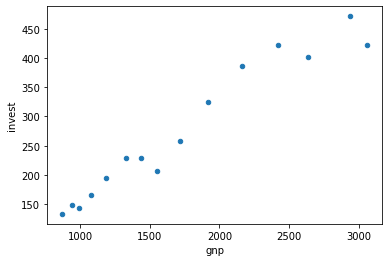

In [3]:
df = pd.DataFrame(invest,columns=['gnp','invest'])
df.plot(x ='gnp', y = 'invest', kind = 'scatter')

For the following we will use a numpy array containing the same data. We also compute the logarithm of the columns as suggested.

In [4]:
# converting to numpy array
gnp = np.asarray(invest['gnp'])
invst = np.asarray(invest['invest'])

# log-transformation of columns
log_gnp = np.log(gnp)
log_invest = np.log(invst)

# sample size
n = len(log_gnp)

### Question 3

We first compute the estimators for the slope and the intercept of the linear regression.

In [5]:
# empirical means
x_bar = np.mean(log_gnp)
Y_bar = np.mean(log_invest)

# centered variables
X_c = log_gnp - x_bar
Y_c = log_invest - Y_bar

# slope
beta_1_hat = np.dot(X_c,Y_c)/lin.norm(X_c,2)**2 
print("Slope:", beta_1_hat)

# intercept
beta_0_hat = Y_bar - beta_1_hat*x_bar 
print("Intercept:", beta_0_hat)

Slope: 1.015281401598871
Intercept: -1.9635913352301815


We then have a look at the regression for the estimators we found.

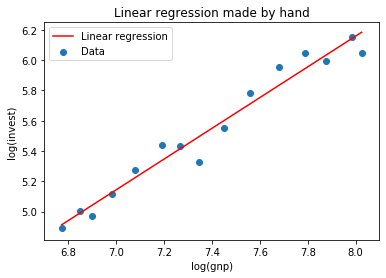

In [6]:
# define regression function with estimators
def linear_regression(x):
    return beta_0_hat + beta_1_hat*x

# plotting the data and check the accuracy of the regression
plt.scatter(log_gnp, log_invest, label = "Data")
plt.plot(log_gnp,linear_regression(log_gnp), color = 'red', label = "Linear regression")
plt.title("Linear regression made by hand")
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.legend()
plt.show()

Then, we estimate the standard deviation $\hat{\sigma}^2$ for the OLS with the previous parameters, from which we deduce the standard deviations of $\hat{\beta}_0$ and $\hat{\beta}_1$ as the square roots of their variances, which are defined as follows :

 $$\mathbb{V}[\hat{\beta}_0] = \hat{\sigma}^2 (\frac{1}{n}+\frac{\overline{x}^2}{\sum_{i=1}^n (x_i - \overline{x})^2})
 \text{  and  } \mathbb{V}[\hat{\beta}_1] = \frac{\hat{\sigma}^2}{\sum_{i=1}^n (x_i - \overline{x})^2}$$
 
 
 We also remind the expression of $\hat{\sigma}^2$ for $p=1$: 
 
 $$\hat{\sigma}^2 = \frac{1}{n-2} \sum_{i=1}^n (Y_i - (\hat{\beta}_0+\hat{\beta}_1x_i))^2$$

In [7]:
# Using the suggested estimator
sigma_square_hat = (1/(n-2))*lin.norm(log_invest-linear_regression(log_gnp),2)**2 
print("Squared standard deviation for OLS :", sigma_square_hat)

# For the intercept
var_beta_0_hat = sigma_square_hat*((1/n)+x_bar*x_bar/lin.norm(X_c,2)**2)
print("Standard deviation for the intercept:", np.sqrt(var_beta_0_hat))

# For the slope
var_beta_1_hat = sigma_square_hat/lin.norm(X_c,2)**2
print("Standard deviation for the slope:", np.sqrt(var_beta_1_hat))

Squared standard deviation for OLS : 0.007676338555460401
Standard deviation for the intercept: 0.4095472716623082
Standard deviation for the slope: 0.05538306035485282


Finally, we estimate the determination coefficient for the ordinary least square. It is defined as: $$ R^2 = 1- \frac{\sum_{i=1}^n (Y_i - (\hat{\beta}_0 + \hat{\beta}_1x_i))^2}{\sum_{i=1}^n (Y_i - \overline{Y})^2} $$ 

In [8]:
R2 = 1 - (lin.norm(log_invest-linear_regression(log_gnp),2)**2)/(lin.norm(Y_c,2)**2)
print("Determination coefficient for OLS:", R2)

Determination coefficient for OLS: 0.9627572956057855


To **sum up**, we found the following values:
* Slope: $\hat{\beta}_1 = 1.015281401598871$
* Intercept: $\hat{\beta}_0 = -1.9635913352301815$
* Standard deviation for the intercept: $\hat{\sigma}_0 = \sqrt{\mathbb{V}[\hat{\beta}_0]} = 0.4825545368305978$
* Standard deviation for the slope: $\hat{\sigma}_1 = \sqrt{\mathbb{V}[\hat{\beta}_1]} = 0.06525582975884993$
* Determination coefficient: $R^2 = 0.9627572956057855$

### Question 4

We want to test the significance of the slope using the Student-$t$ test. We start by computing the test statistic and the p-value.

In [9]:
freedom_degrees = n - 1 - 1

alpha = 0.05 # chosen confidence level 

test = np.abs(beta_1_hat/np.sqrt(var_beta_1_hat)) <= stats.t.ppf(1 - alpha/2, freedom_degrees)
print("Test statistic with level", alpha, ":", test)

p_value = 2*(1-stats.t.cdf(beta_1_hat/np.sqrt(var_beta_1_hat), freedom_degrees)) 
# multiply by 2 as we look on both sides
print("p-value for Student-t test:", p_value)

Test statistic with level 0.05 : False
p-value for Student-t test: 1.1363709973011282e-10


We can then say that the null hypothesis $H_0 : "\hat{\beta}_1 = 0"$ can be rejected with the confidence level $1-\alpha = 0,95 = 95$%.

### Question 5

For the GNP 1000, we want to predict the necessary Investment and provide confidence and prediction intervals for the 90% level.

The Investment we are looking for is just the outcome of the regression that we computed before at the given point $x = \text{log}(1000)$ (as we consider the log-scaled data):

In [10]:
invest_1000 = linear_regression(np.log(1000))
print("The logarithm of the necessary investment for a GNP of 1000 is", invest_1000,
      ", hence the value of the Investment is:", np.exp(invest_1000))

The logarithm of the necessary investment for a GNP of 1000 is 5.049724126316802 , hence the value of the Investment is: 155.97942793105494


We then define and apply the functions for the confidence interval and prediction interval such as given on the lab sheet.

In [11]:
quantile = stats.t.ppf(1-0.1/2, n-2)
norm2_Xc = lin.norm(X_c,2)**2

def CI(x):
    # lower boundary
    lower = linear_regression(x) - quantile*np.sqrt(sigma_square_hat*(1/n+((x-x_bar)**2)/norm2_Xc))       
    # upper boundary
    upper = linear_regression(x) + quantile*np.sqrt(sigma_square_hat*(1/n+((x-x_bar)**2)/norm2_Xc))
    return(lower, upper)

def PI(x):
    # lower boundary
    lower = linear_regression(x) - quantile*np.sqrt(sigma_square_hat*(1+1/n+((x-x_bar)**2)/norm2_Xc))         
    # upper boundary
    upper = linear_regression(x) + quantile*np.sqrt(sigma_square_hat*(1+1/n+((x-x_bar)**2)/norm2_Xc))
    return(lower, upper)

print("Confidence Interval for the 90% level:")
print("The lower boundary of the confidence interval is", CI(np.log(1000))[0])
print("The upper boundary of the confidence interval is", CI(np.log(1000))[1])
print()
print("Prediction Interval for the 90% level:")
print("The lower boundary of the prediction interval is", PI(np.log(1000))[0])
print("The upper boundary of the prediction interval is", PI(np.log(1000))[1])            

Confidence Interval for the 90% level:
The lower boundary of the confidence interval is 4.98822284597111
The upper boundary of the confidence interval is 5.111225406662493

Prediction Interval for the 90% level:
The lower boundary of the prediction interval is 4.882820023438681
The upper boundary of the prediction interval is 5.216628229194923


### Question 6

We add the information from the previous question onto the graph that was displayed at question 3.

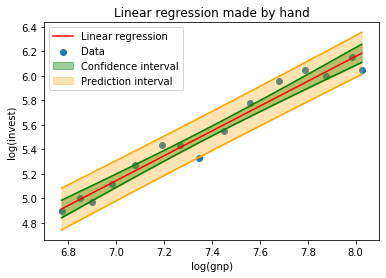

In [12]:
# data and linear regression
plt.scatter(log_gnp, log_invest, label = "Data")
plt.plot(log_gnp,linear_regression(log_gnp), color = 'red', label = "Linear regression")

# confidence interval
plt.plot(log_gnp,CI(log_gnp)[0], color = 'green')
plt.plot(log_gnp,CI(log_gnp)[1], color = 'green')
plt.fill_between(log_gnp, CI(log_gnp)[0], CI(log_gnp)[1], color='green', label = "Confidence interval", alpha=.4)

# prediction interval
plt.plot(log_gnp,PI(log_gnp)[0], color = 'orange')
plt.plot(log_gnp,PI(log_gnp)[1], color = 'orange')
plt.fill_between(log_gnp, PI(log_gnp)[0], PI(log_gnp)[1], color='orange', label = "Prediction interval", alpha=.3)

# title and axes
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.title("Linear regression made by hand")
plt.legend()
plt.show()

### Question 7

We will use the class ``LinearRegression()`` from ``sklearn.linear_model`` in order to compare it to our previous regression.

In [13]:
regr = LinearRegression()

# fitting the model with appropriate shape
regr.fit(log_gnp.reshape(-1,1), log_invest.reshape(-1,1))

print("Slope found:", regr.coef_[0][0])
print("Intercept found:",regr.intercept_[0])
print("Determination coefficient found:", regr.score(log_gnp.reshape(-1,1), log_invest.reshape(-1,1)))
print("The necessary investment for a GNP of 1000 is:", np.exp(regr.predict([[np.log(1000)]])[0][0]))

Slope found: 1.015281401598871
Intercept found: -1.9635913352301815
Determination coefficient found: 0.9627572956057855
The necessary investment for a GNP of 1000 is: 155.97942793105494


We do find the exact **same values** as the regression made 'by hand' for $\hat{\beta}_0$, $\hat{\beta}_1$, $R^2$ and the investment corresponding to a GNP of 1000.

### Question 8

We then plot the values for the regression from ``sklearn.linear_model`` on a graph with the same aspect as the graph for the other regression, in order to ensure that both graphs coincide.

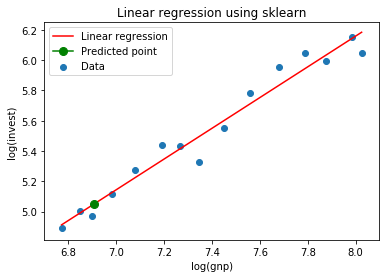

In [14]:
# plotting the sklearn regression
regression = regr.predict(log_gnp.reshape(-1,1))

# getting the coordinates for the predicted point
x_point = np.log(1000)
y_point = regr.predict([[x_point]])[0][0]

# display on graph
plt.scatter(log_gnp, log_invest, label = "Data")
plt.plot(log_gnp, regression, color = 'red', label = "Linear regression")
plt.plot(x_point, y_point, marker = 'o', markersize = 8, color = "green", label = "Predicted point")
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.title("Linear regression using sklearn")
plt.legend()
plt.show()

It can then be concluded that the sklearn regression gives a similar result as the 'hand-made' regression.

### Part 2: Steps 9 to 13 (p = 2)

### Question 9

The Gram matrix is defined as $\hat{G}_n=\frac{X^TX}{n}$ where $X = (\mathbb{1}_n, \text{log(gnp)}, \text{interest}) \in \mathbb{R}^{15 \times 3}$ 

In [15]:
# getting the interest column into a numpy array
interest = np.asarray(invest['interest'])

# defining Gram matrix
X = np.transpose(np.array([np.ones(n), log_gnp, interest]))
Gram = np.dot(np.transpose(X),X)/n

print("Gram matrix is of shape:", Gram.shape)
print("The rank of Gram matrix is:", lin.matrix_rank(Gram))

Gram matrix is of shape: (3, 3)
The rank of Gram matrix is: 3


Then **Gram matrix is full rank**, hence **OLS is uniquely defined** here.

### Question 10

We define the problem as solving $Y = XB$ where:
* $Y = (\text{log(invest)}) \in \mathbb{R}^{15 \times 1}$ 


* $B = (\hat{\beta}_0 \text{ } \hat{\beta}_1 \text{ } \hat{\beta}_2)\in \mathbb{R}^{1 \times 3}$ 


* $    X = 
    \left[ {\begin{array}{ccc}
     1 & \text{log(gnp)}_1 & \text{interest}_1 \\
     . & . & . \\
     . & . & . \\
     . & . & . \\
     1 & \text{log(gnp)}_n & \text{interest}_n \\
     \end{array} } \right] \in \mathbb{R}^{15 \times 3}
$


We then have: $$\begin{align} 
    XB &= Y \\ 
    X^TXB &= X^TY \\
    n\hat{G}_nB &= X^TY \\
    B &= \frac{\hat{G}_n^{-1}X^TY}{n} \text{ as Gram matrix is full rank} 
    \end{align}$$
 
We use this result to compute the three regression coefficients.

In [16]:
# using the same notation
Y = log_invest
B = (1/n)*np.dot(lin.inv(Gram), np.dot(np.transpose(X),Y))

# regression coefficients
beta_0_hat = B[0]
beta_1_hat = B[1]
beta_2_hat = B[2]

print("Intercept:", beta_0_hat)
print("Regression coefficient for log(gnp):", beta_1_hat)
print("Regression coefficient for interest:", beta_2_hat)

Intercept: -2.1804547259145086
Regression coefficient for log(gnp): 1.0512426913202337
Regression coefficient for interest: -0.006528879406126483


We then compute the standard deviation $\hat{\sigma}^2$ and the determination coefficient $R^2$ for these new regression coefficients.

In [17]:
# New regression function
def linear_regression_bis(x,y): 
    # with (x,y) = (log(gnp), interest)
    return beta_0_hat + beta_1_hat*x + beta_2_hat*y

# Standard deviation for OLS
sigma_square_hat = (1/(n-3)) * lin.norm(log_invest-linear_regression_bis(log_gnp, interest),2)**2
print("Squared standard deviation:", sigma_square_hat)

C = sigma_square_hat * lin.inv(n*Gram)

print("Standard deviation for intercept is:", np.sqrt(C[0,0]))
print("Standard deviation for the regression coefficient for log(gnp) is:", np.sqrt(C[1,1]))
print("Standard deviation for the regression coefficient for interest is:", np.sqrt(C[2,2]))

# Determination coefficient
R2 = 1 - (lin.norm(log_invest-linear_regression_bis(log_gnp, interest),2)**2)/(lin.norm(Y_c,2)**2)
print("Determination coefficient for OLS:", R2)

Squared standard deviation: 0.008192432955519793
Standard deviation for intercept is: 0.6623991977963696
Standard deviation for the regression coefficient for log(gnp) is: 0.10206137806192321
Standard deviation for the regression coefficient for interest is: 0.015344205065604214
Determination coefficient for OLS: 0.9633108306726244


To **sum up**, we found the following values:
* **Regression coefficients**:
    * Intercept: $\hat{\beta}_0 = -2.1804547259145086$
    * Regression coefficient for log(gnp): $\hat{\beta}_1 = 1.0512426913202337$
    * Regression coefficient for interest: $\hat{\beta}_2 = -0.006528879406126483$
    
    
* **Standard deviations**:    
    * Standard deviation for the intercept: $\hat{\sigma}_0 = \sqrt{\mathbb{V}[\hat{\beta}_0]} = 0.6623991977963696$
    * Standard deviation for the coefficient for log(gnp): $\hat{\sigma}_1 = \sqrt{\mathbb{V}[\hat{\beta}_1]} = 0.10206137806192321$
    * Standard deviation for the coefficient for the interest: $\hat{\sigma}_2 = \sqrt{\mathbb{V}[\hat{\beta}_2]} = 0.015344205065604214$
    
    
* **Determination coefficient**: $R^2 = 0.9633108306726244$


We then seek to test the significance of the regression coefficients using the Student-$t$ test.

In [18]:
freedom_degrees = n - 2 - 1

# chosen confidence level
alpha = 0.05  

# Test statistics
print("Test statistics:")

test_0 = np.abs(beta_0_hat/np.sqrt(C[0,0])) <= stats.t.ppf(1 - alpha/2, freedom_degrees)
print("Test statistic for beta_0_hat with level", alpha, ":", test_0)

test_1 = np.abs(beta_1_hat/np.sqrt(C[1,1])) <= stats.t.ppf(1 - alpha/2, freedom_degrees)
print("Test statistic for beta_1_hat with level", alpha, ":", test_1)

test_2 = np.abs(beta_2_hat/np.sqrt(C[2,2])) <= stats.t.ppf(1 - alpha/2, freedom_degrees)
print("Test statistic for beta_2_hat with level", alpha, ":", test_2)

print(" ")

# p-values
print("p-values:")

p_value_0 = 2*stats.t.cdf(x = -abs(beta_0_hat/np.sqrt(C[0,0])), df=freedom_degrees)
# multiply by 2 as we look on both sides
print("p-value for beta_0_hat for Student-t test:", p_value_0)

p_value_1 = 2*stats.t.cdf(x = -abs(beta_1_hat/np.sqrt(C[1,1])), df=freedom_degrees)
print("p-value for beta_1_hat for Student-t test:", p_value_1)

p_value_2 = 2*stats.t.cdf(x = -abs(beta_2_hat/np.sqrt(C[2,2])), df=freedom_degrees)
print("p-value for beta_2_hat for Student-t test:", p_value_2)

Test statistics:
Test statistic for beta_0_hat with level 0.05 : False
Test statistic for beta_1_hat with level 0.05 : False
Test statistic for beta_2_hat with level 0.05 : True
 
p-values:
p-value for beta_0_hat for Student-t test: 0.006438367050879084
p-value for beta_1_hat for Student-t test: 2.599516848847801e-07
p-value for beta_2_hat for Student-t test: 0.6780071418811793


We can then say that the null hypothesis $H_0 : "\hat{\beta} = 0"$ can be rejected with the confidence level $1-\alpha = 0,95 = 95$% for $\hat{\beta}_0$ and $\hat{\beta}_1$, but cannot be rejected with the confidence level $95$% as regards $\hat{\beta}_2$.

The p-values obtained for Student-$t$ test are:
* For $\hat{\beta}_0$: 0.006438367050879084
* For $\hat{\beta}_1$: 2.599516848847801e-07
* For $\hat{\beta}_2$: 0.6780071418811793


From all this question, we can see that **the intercept** and **the regression coefficient corresponding to $\text{log(gnp)}$** are rather **signifcant** (the Student-$t$ test proves that the null hypothesis $H_0$ can be rejected for the $95$% level). 

**However, the significance of $\hat{\beta}_2$ can be discussed**. Indeed, the the Student-$t$ test states that the null hypothesis $H_0$ cannot be rejected for the $95$% level. Besides, the standard deviation $\hat{\sigma}_2$ we found is higher in absolute value than $\hat{\beta}_2$. We can then **question the significance of this regression coefficient**.

As the p-value for $\hat{\beta}_2$ equals $0.6780071418816093$, the null hypothesis can be rejected with a confidence level of about $32\%$, which is too small. 

On the other hand, the hypothesis "$\hat{\beta}_0 = 0$" has a p-value of $0.006438367050885517$, so the null hypothesis can be rejected with a confidence of about $99\%$.

And, "$\hat{\beta}_1 = 0$" can be rejected with a confidence of more than $99,9999\%$, because the corresponding p-value equals $2.5995168488518274.10^{-7}$.

Therefore, we may assume that $\hat{\beta}_0 \neq 0$ and $\hat{\beta}_1 \neq 0$ whereas $\hat{\beta}_2$ might be equal to $0$. 

**If the null hypothesis for $\hat{\beta}_2$ is accepted, the calculation of the investment does not depend on the amount of interest**. In any case, $\hat{\beta}_2$ is so low compared to the other two coefficients that its influence is negligible.

### Question 11

In [19]:
print("For log(gnp) = log(1000) and interest = 10, we get log(invest) =", linear_regression_bis(np.log(1000),10))

For log(gnp) = log(1000) and interest = 10, we get log(invest) = 5.015983730482961


In [20]:
quantile = stats.t.ppf(1-0.001/2, n-3)

def CI_low(x,y):
    z = np.array([1,x,y])
    mat = np.dot(np.transpose(z),np.dot(lin.inv(Gram),z))
    # lower boundary
    lower = linear_regression_bis(x,y) - quantile*np.sqrt((sigma_square_hat/n)*mat)      
    return lower

def CI_up(x,y):
    z = np.array([1,x,y])
    mat = np.dot(np.transpose(z),np.dot(lin.inv(Gram),z))      
    # upper boundary
    upper = linear_regression_bis(x,y) + quantile*np.sqrt((sigma_square_hat/n)*mat)
    return upper

def PI_low(x,y):
    z = np.array([1,x,y])
    mat = np.dot(np.transpose(z),np.dot(lin.inv(Gram),z))
    # lower boundary
    lower = linear_regression_bis(x,y) - quantile*np.sqrt(sigma_square_hat*(1+(1/n)*mat))      
    return lower

def PI_up(x,y):
    z = np.array([1,x,y])
    mat = np.dot(np.transpose(z),np.dot(lin.inv(Gram),z))
    # upper boundary
    upper = linear_regression_bis(x,y) + quantile*np.sqrt(sigma_square_hat*(1+(1/n)*mat))
    return upper

print("Confidence Interval for the 99.9% level:")
print("The lower boundary of the confidence interval is", CI_low(np.log(1000),10))
print("The upper boundary of the confidence interval is", CI_up(np.log(1000),10))
print()
print("Prediction Interval for the 99.9% level:")
print("The lower boundary of the prediction interval is", PI_low(np.log(1000),10))
print("The upper boundary of the prediction interval is", PI_up(np.log(1000),10))     

Confidence Interval for the 99.9% level:
The lower boundary of the confidence interval is 4.640184036688369
The upper boundary of the confidence interval is 5.391783424277552

Prediction Interval for the 99.9% level:
The lower boundary of the prediction interval is 4.47380334364055
The upper boundary of the prediction interval is 5.558164117325371


Thus, **the log(Investment) we predict for ($\text{log(1000)}$,$10$) is $5.015983730482961$**. 

Besides, for the $99.9$% level, we have for this specific predicted point:
* **Confidence interval**: [$4.640184036688369$, $5.391783424277552$]
* **Prediction interval**: [$4.47380334364055$, $5.558164117325371$]

### Question 12

We plot the results we obtained on a 3D-graph.

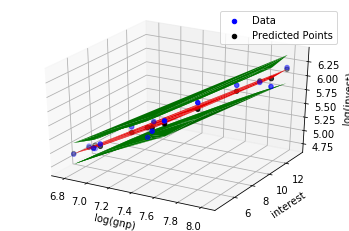

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# getting the data
X = log_gnp
Y = interest
Z = log_invest
T = linear_regression_bis(X, Y).reshape(-1)
CI = (CI_low(X, Y), CI_up(X,Y))
PI = (PI_low(X, Y), PI_up(X,Y))

# plotting the data
ax.scatter(X,Y,Z, label = "Data", color = "blue")
ax.scatter(X,Y,T, label = "Predicted Points", color = "black")
ax.plot_trisurf(X, Y, T , color = "red")
ax.plot_trisurf(X, Y, CI[0] , color = "green")
ax.plot_trisurf(X, Y, CI[1] , color = "green")

# title and axes of the graph
ax.set_xlabel('log(gnp)')
ax.set_ylabel('interest')
ax.set_zlabel('log(invest)')
ax.legend()

#ax.view_init(5,260) # can be used to rotate the output to get other points of view

Here, it can be seen the <font color="red"><b>regression plane</b></font> and the <font color="green"><b>confidence interval </b></font> displayed.

### Question 13

We implement once again the linear regression with ``sklearn`` and compare the results with our previous linear regression.

In [22]:
regr2 = LinearRegression()

# array of (log_gnp, interest)
X_fit = np.concatenate((log_gnp.reshape(-1, 1), interest.reshape(-1, 1)), axis = 1)

# fitting the model 
regr2.fit(X_fit, log_invest.reshape(-1,1))

# plotting the sklearn regression
regression3D = regr2.predict(X_fit)

print("Regression coefficient for log(gnp):", regr2.coef_[0][0])
print("Regression coefficient for interest:", regr2.coef_[0][1])
print("Intercept found:",regr2.predict([[0,0]])[0][0])
print("Determination coefficient found:", regr2.score(X_fit, log_invest))
print("The logarithm of necessary investment for a GNP of 1000 is", regr2.predict([[np.log(1000), 10]])[0][0])

Regression coefficient for log(gnp): 1.051242691319659
Regression coefficient for interest: -0.006528879406068229
Intercept found: -2.1804547259113995
Determination coefficient found: 0.9633108306726245
The logarithm of necessary investment for a GNP of 1000 is 5.015983730482683


Once again, the values we found using ``LinearRegression()`` class from ``sklearn.linear_model`` are **exactly similar** as the ones found using the 'hand-made' regression.

We can then plot the result to get a more graphical output.

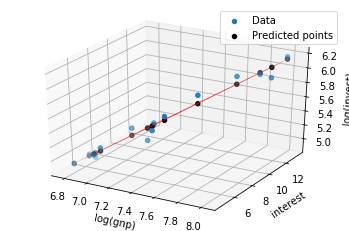

In [23]:
# display on graph
fig2 = plt.figure()
bx = fig2.add_subplot(111, projection='3d')
bx.scatter(X, Y, Z, label = "Data")
bx.scatter(X, Y, regression3D, color = 'black', label = "Predicted points")
bx.plot_trisurf(X, Y, regression3D.reshape(-1), color = 'red')

# axes of the graph
bx.set_xlabel('log(gnp)')
bx.set_ylabel('interest')
bx.set_zlabel('log(invest)')
bx.legend()

With another angle:

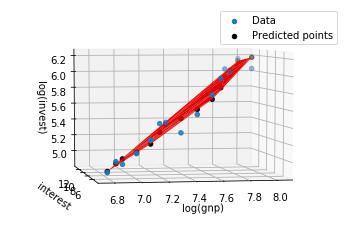

In [24]:
# display on graph
fig3 = plt.figure()
cx = fig3.add_subplot(111, projection='3d')
cx.scatter(X, Y, Z, label = "Data")
cx.scatter(X, Y, regression3D, color = 'black', label = "Predicted points")
cx.plot_trisurf(X, Y, regression3D.reshape(-1), color = 'red')

# axes of the graph
cx.set_xlabel('log(gnp)')
cx.set_ylabel('interest')
cx.set_zlabel('log(invest)')
cx.legend()

cx.view_init(5,260)